# Lab Instructions

Find a dataset that interests you. I'd recommend starting on [Kaggle](https://www.kaggle.com/). Read through all of the material about the dataset and download a .CSV file.

1. Write a short summary of the data.  Where did it come from?  How was it collected?  What are the features in the data?  Why is this dataset interesting to you?  

2. Identify 5 interesting questions about your data that you can answer using Pandas methods.  

3. Answer those questions!  You may use any method you want (including LLMs) to help you write your code; however, you should use Pandas to find the answers.  LLMs will not always write code in this way without specific instruction.  

4. Write the answer to your question in a text box underneath the code you used to calculate the answer.



# Summary

This dataset was collected by Allison and Cicchetti in 1976 for a study about mammels sleep patterns to analyze the relationship between an animals physical and ecological characteristics.

Features:
* body_weight (kg)
* brain_weight (g)
* max_life_span (years)
* gestation_time (days)
* total_sleep (hours/day)
* ecological Indices (1-5 scale)
    * predation_index (likelihood of being preyed upon)
    * sleep_exposure_index (how exposed they are while sleeping)
    * danger_index (overall danger)

I couldn't find any datasets that were good about topics that I really found interesting, so I went with this dateset because of how accesable the data was and I thought it'd be cool to learn about the topic.

# Five Interesting Questions

* Do animals in greater danger sleep less?
* Is there a correlation between brain size and life span?
* Which animal sleeps the most?
* Does body weight affect gestation time?
* How is the "Predation Index" distributed?

note:dataset_2191_sleep.csv

In [27]:
import pandas as pd

sleep_df = pd.read_csv('dataset_2191_sleep.csv', na_values='?') # slops ? making data be strings

sleep_df['total_sleep'] = pd.to_numeric(sleep_df['total_sleep'], errors='coerce') # values to ints

sleep_df.head()

,body_weight,brain_weight,max_life_span,gestation_time,predation_index,sleep_exposure_index,danger_index,total_sleep
0,6654.000,5712.0,38.6,645.0,3,5,3,3.3
1,1.000,6.6,4.5,42.0,3,1,3,8.3
2,3.385,44.5,14.0,60.0,1,1,1,12.5
3,0.920,5.7,NaN,25.0,5,2,3,16.5
4,2547.000,4603.0,69.0,624.0,3,5,4,3.9


<Axes: title={'center': 'Average Sleep by Danger Level (1-5)'}, xlabel='Total Sleep (Hours)', ylabel='Danger Category (1=Least, 5=Most)'>

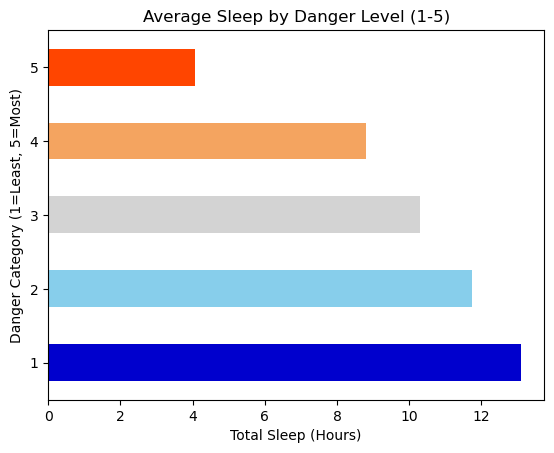

In [33]:
custom_colors = ['mediumblue', 'skyblue', 'lightgrey', 'sandybrown', 'orangered']

danger_to_sleep = sleep_df.groupby('danger_index')['total_sleep'].mean()
danger_to_sleep.plot(kind='barh', 
                     title='Average Sleep by Danger Level (1-5)',
                     ylabel='Danger Category (1=Least, 5=Most)',
                     xlabel='Total Sleep (Hours)', color=custom_colors)

# Q1 - Do Animals in greater danger sleep less?

Against my intrusic thought, the data shows that animals that are less preditory sleep more while preditors sleep less. I would wonder if these sleep hours are only being evaluated at night when some preditors would choose to sleep during day to hunt at night.

In [ ]:
correlation = sleep_df['brain_weight'].corr(sleep_df['max_life_span'])
print(f"Correlation Coefficient: {correlation:.2f}")

# Visualization using ONLY Pandas
# kind='scatter' requires x and y arguments
sleep_df.plot(kind='scatter', 
              x='brain_weight', 
              y='max_life_span', 
              title='Brain Weight vs. Max Life Span',
              xlabel='Brain Weight (g)',
              ylabel='Max Life Span (years)',
              color='teal')